# This is 1st question of KMeans

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
class KMeans:
    def __init__(self, k=2, epochs=100, ep=1e-4, seed=42):
        self.k = k
        self.epochs = epochs
        self.ep = ep
        np.random.seed(seed)
        self.centroids = None
        self.labels = None
        self.j_hist = []

    def init_centroids(self, X):
        idxs = np.random.choice(X.shape[0], self.k, replace=False)
        return X[idxs]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        return np.argmin(distances, axis=1)

    '''
    def labels(X, centroids):
    assign = []
    for x in X:
        distances = [dist(x, pt) for pt in centroids]
        assign.append(np.argmin(distances))
    return np.array(assign)
    '''

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                centroids[i] = points.mean(axis=0)
            else:
                centroids[i] = X[np.random.choice(X.shape[0])]
        return centroids

    def compute_objective(self, X, labels, centroids):
        total = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            total += np.sum((cluster_points - centroids[i]) ** 2)
        return total / X.shape[0]

    def fit(self, X):
        self.centroids = self.init_centroids(X)
        for i in range(self.epochs):
            labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, labels)
            j = self.compute_objective(X, labels, new_centroids)
            self.j_hist.append(round(j, 4))
            if np.linalg.norm(new_centroids - self.centroids) < self.ep:
                break
            self.centroids = new_centroids
        self.labels = labels
        return self

    def plot_convergence(self):
        plt.figure()
        plt.plot(range(1, len(self.j_hist) + 1), self.j_hist, marker='o')
        plt.title('Convergece of KMeans Objective j')
        plt.xlabel('epochs')
        plt.ylabel('J (Average Squared Distance)')
        plt.grid(True)
        plt.show()

    def plot_clusters(self, X):
        plt.figure()
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
        for i in range(self.k):
            pts = X[self.labels == i]
            plt.scatter(pts[:, 0], pts[:, 1], s=50, c=colors[i % len(colors)], label=f"Cluster {i + 1}")
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='black', s=150, marker='x', label='centroids')
        plt.title('K Means clustering Result')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

Enter 6 lines of data points (each with 2 space-separated features):

Final Centroids:
1 = (1.17, 1.37)
2 = (6.67, 9.33)
Cluster Assignments: [1, 1, 2, 2, 1, 2]
Final Cost J (average squared distance): 2.4178
Final WCSS (total sum of squared distances): 14.5068
J history (per iteration): [np.float64(12.3488), np.float64(2.4178), np.float64(2.4178)]


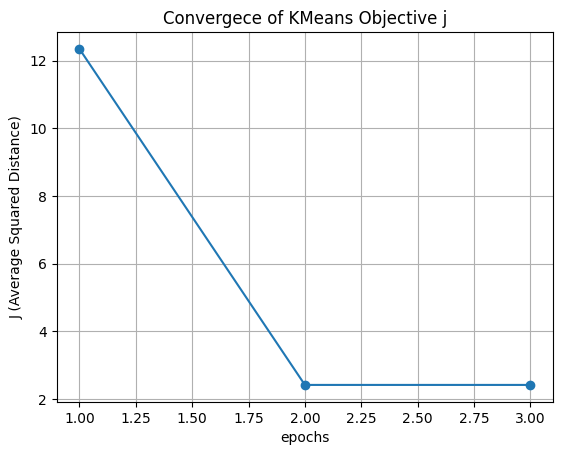

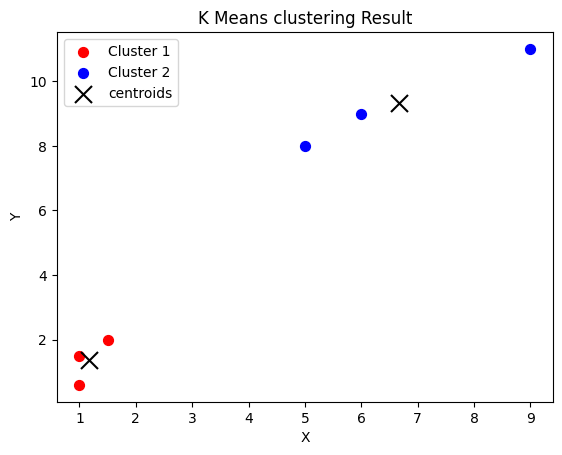

In [17]:

# Read input
m = int(input("Enter number of samples (m): "))
n = int(input("Enter number of features (n): "))
K = int(input("Enter number of clusters (K): "))

print(f"Enter {m} lines of data points (each with {n} space-separated features):")
data = []
for _ in range(m):
    line = input()
    point = list(map(float, line.strip().split()))
    if len(point) != n:
        raise ValueError(f"Expected {n} features, got {len(point)}")
    data.append(point)

X = np.array(data)

kmeans = KMeans(k=K, epochs=100, seed=42)
kmeans.fit(X)

print('\nFinal Centroids:')
for i, c in enumerate(kmeans.centroids, 1):
    print(f'{i} = ({c[0]:.2f}, {c[1]:.2f})')

print('Cluster Assignments:', (kmeans.labels + 1).tolist())

print(f"Final Cost J (average squared distance): {round(kmeans.j_hist[-1], 4)}")
print(f"Final WCSS (total sum of squared distances): {round(kmeans.j_hist[-1] * m, 4)}")
print("J history (per iteration):", kmeans.j_hist)

# Optional plotting (uncomment if you want)
kmeans.plot_convergence()
kmeans.plot_clusters(X)




Final Centroids:
1 = (4.93, 5.05)
2 = (9.12, 1.16)
3 = (1.02, 1.02)
Cluster Assignments: [2, 1, 3, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 1, 3, 2, 3, 3, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 3, 1, 3, 3, 3, 2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 2, 3, 2, 3, 1, 3, 3, 2, 1, 3, 2, 2, 1, 1, 3, 2, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1, 2, 3, 2, 3, 3, 3, 1, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 

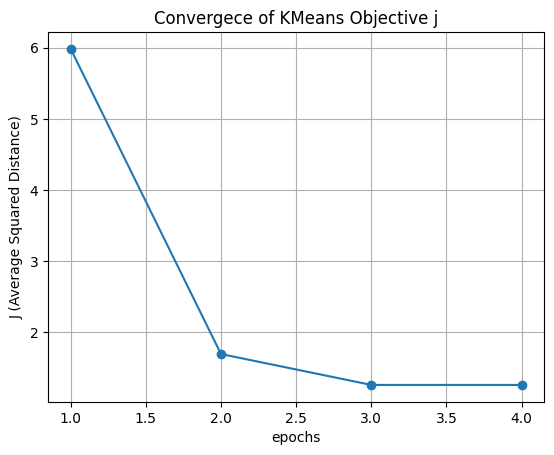

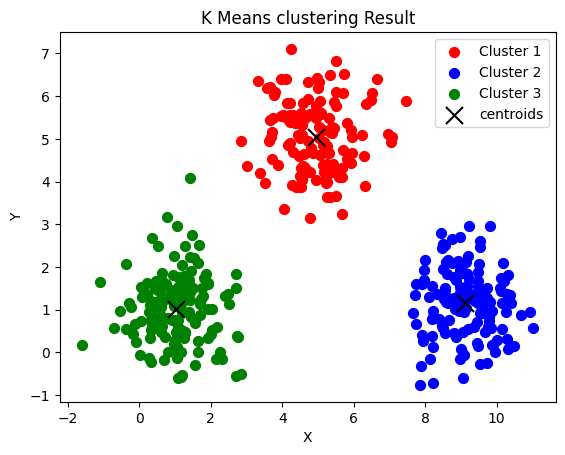

In [40]:
df = pd.read_csv('train.csv', header=None)

# Assuming all columns are features
X = df.values  # Converts dataframe to numpy array

m, n = X.shape

K = int(input("Enter number of clusters (K): "))

kmeans = KMeans(k=K, epochs=100, seed=42)
kmeans.fit(X)

print('\nFinal Centroids:')
for i, c in enumerate(kmeans.centroids, 1):
    print(f'{i} = ({c[0]:.2f}, {c[1]:.2f})')

print('Cluster Assignments:', (kmeans.labels + 1).tolist())

print(f"Final Cost J (average squared distance): {round(kmeans.j_hist[-1], 4)}")
print(f"Final WCSS (total sum of squared distances): {round(kmeans.j_hist[-1] * m, 4)}")
print("J history (per iteration):", kmeans.j_hist)

kmeans.plot_convergence()
kmeans.plot_clusters(X)

# Kmeans Question 2

In [56]:
def kmeans_plus_plus_init(X, k, seed=0):
    np.random.seed(seed)
    n_samples, _ = X.shape
    centroids = np.zeros((k, X.shape[1]))
    centroids[0] = X[np.random.choice(n_samples)]
    closest = np.full(n_samples, np.inf)

    for id in range(1, k):
        dist_centroid = np.linalg.norm(X - centroids[id - 1], axis=1) ** 2
        closest = np.minimum(closest, dist_centroid)
        probs = closest / closest.sum()
        cumu_probs = np.cumsum(probs)
        r = np.random.rand()
        next_idx = np.searchsorted(cumu_probs, r)
        centroids[id] = X[next_idx]
    return centroids

In [57]:
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
    return np.argmin(distances, axis=1)

In [58]:
def update_centroids(X, labels, k):
    n = X.shape[1]
    centroids = np.zeros((k, n))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            centroids[i] = X[np.random.choice(len(X))]
        else:
            centroids[i] = cluster_points.mean(axis=0)

    return centroids

In [59]:
def compute_wcss(X, labels, centroids):
    total = 0.0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        dists = np.linalg.norm(cluster_points - centroids[k], axis=1) ** 2
        total += dists.sum()
    return total

In [60]:
def compute_j(X, labels, centroids):
    wcss = compute_wcss(X, labels, centroids)
    return wcss / X.shape[0]

In [61]:
def kmeans(X, k, epochs, seed=0):
    centroids = kmeans_plus_plus_init(X, k, seed)
    for i in range(epochs):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    labels = assign_clusters(X, centroids)
    return centroids, labels

In [62]:
def kneedle_elbow(kmax, wcss_list):
    x1, y1 = 1, wcss_list[0]
    x2, y2 = kmax, wcss_list[-1]

    max_dist = -1
    elbow = 1

    for k in range(1, kmax + 1):
        x0 = k
        y0 = wcss_list[k - 1]
        numerator = abs((x2 - x1) * (y1 - y0) - (x1 - x0)*(y2 - y1))
        denominator = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        dist = numerator / denominator
        if dist > max_dist:
            max_dist = dist
            elbow = k
    return elbow

Elbow_K=3
WCSS_Val=[np.float64(1379.26), np.float64(638.25), np.float64(106.82), np.float64(95.86), np.float64(83.5), np.float64(76.66)]
Test_J_Elbow=1.24 Test_WCSS_Elbow=111.57


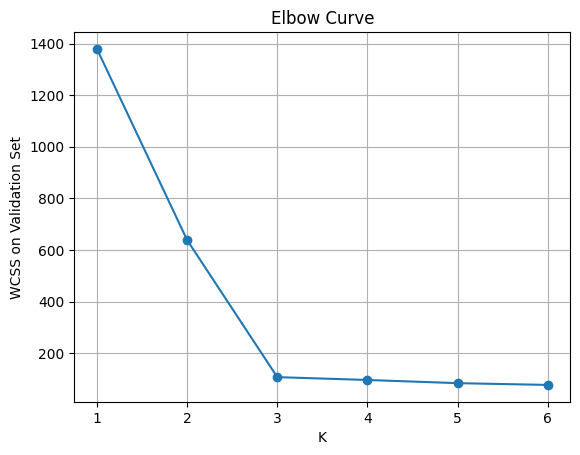

In [66]:
line1 = "Kmax=6"
line2 = "iterations=10"
Kmax = int(line1.split('=')[1])
max_iters = int(line2.split('=')[1])
train = np.loadtxt('train.csv', delimiter=',')
val = np.loadtxt('val.csv', delimiter=',')
test = np.loadtxt('test.csv', delimiter=',')
WCSS_val = []
for K in range(1, Kmax+1):
    centroids, labels = kmeans(train, K, max_iters, seed=0)
    val_labels = assign_clusters(val, centroids)
    wcss = compute_wcss(val, val_labels, centroids)
    WCSS_val.append(round(wcss, 2))
elbow_K = kneedle_elbow(Kmax, WCSS_val)
centroids, labels = kmeans(train, elbow_K, max_iters, seed=0)
test_labels = assign_clusters(test, centroids)
test_wcss = compute_wcss(test, test_labels, centroids)
test_j = test_wcss / test.shape[0]
print(f"Elbow_K={elbow_K}")
print(f"WCSS_Val={WCSS_val}")
print(f"Test_J_Elbow={test_j:.2f} Test_WCSS_Elbow={test_wcss:.2f}")
plt.figure()
plt.plot(range(1, Kmax+1), WCSS_val, marker='o')
plt.xlabel('K')
plt.ylabel('WCSS on Validation Set')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()


# SVM

## Question 1

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def load_data(path):
    data = pd.read_csv(path)
    X = data[['x1', 'x2']].values
    y = data['y'].values
    return X, y

In [103]:
def plot_decision_boundary(X, y, model_func, title, support_vectors=None, filename=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='r', label='Class -1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='grey', linestyles='--')

    if support_vectors is not None:
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=80, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(title)
    plt.legend()
    if filename:
        plt.savefig(filename)
        print(f"Saved {filename}")
    plt.show()

In [104]:
class LinearSVM:
    def __init__(self, c=1.0, lr=0.001, epochs=1000):
        self.c = c
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0

        for epoch in range(self.epochs):
            idxs = np.arange(n)
            np.random.shuffle(idxs)
            for i in idxs:
                condition = y[i] * (np.dot(X[i], self.w) + self.b)
                if condition >= 1:
                    self.w -= self.lr * self.w
                else:
                    self.w -= self.lr * (self.w - self.c * y[i] * X[i])
                    self.b += self.lr * self.c * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

    

In [105]:
def rbf_kernel(x1, x2, sigma):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * sigma ** 2))

In [106]:
def poly_kernel(x1, x2, degree=3):
    return (np.dot(x1, x2) + 1) ** degree

In [107]:
class KernelSVM:
    def __init__(self, c=1.0, kernel='rbf', sigma=1.0, degree=3, tol=1e-3, max_passes=5):
        self.c = c
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.tol = tol
        self.max_passes = max_passes


    def compute_kernel_matrix(self, X):
        n = len(X)
        k = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if self.kernel == 'rbf':
                    k[i, j] = rbf_kernel(X[i], X[j], self.sigma)
                else:
                    k[i, j] = poly_kernel(X[i], X[j], self.degree)

        return k

    def fit(self, X, y):
        n = len(X)
        self.X, self.y = X, y
        self.alpha = np.zeros(n)
        self.b = 0
        k = self.compute_kernel_matrix(X)

        passes = 0
        while passes < self.max_passes:
            num_changed = 0
            for i in range(n):
                ei = np.dot((self.alpha * y), k[:, i]) + self.b - y[i]
                if (y[i] * ei < -self.tol and self.alpha[i] < self.c) or (y[i] * ei > self.tol and self.alpha[i] > 0):
                    j = np.random.choice([x for x in range(n) if x != i])
                    ej = np.dot((self.alpha * y), k[:, j]) + self.b - y[j]

                    alpha_i_old, alpha_j_old = self.alpha[i], self.alpha[j]
                    if y[i] != y[j]:
                        l = max(0, self.alpha[j] - self.alpha[i])
                        h = min(self.c, self.c + self.alpha[j] - self.alpha[i])
                    else:
                        l = max(0, self.alpha[i] + self.alpha[j] - self.c)
                        h = min(self.c, self.alpha[i] + self.alpha[j])
                    if l == h:
                        continue

                    eta = 2 * k[i, j] - k[i, i] - k[j, j]
                    if eta >= 0:
                        continue

                    self.alpha[j] -= y[j] * (ei - ej) / eta
                    self.alpha[j] = np.clip(self.alpha[j], l, h)
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    self.alpha[i] += y[i] * y[j] * (alpha_j_old - self.alpha[j])
                    b1 = self.b - ei - y[i] * (self.alpha[i] - alpha_i_old) * k[i, i] - y[j] * (self.alpha[j] - alpha_j_old) * k[i, j]
                    b2 = self.b - ej - y[i] * (self.alpha[i] - alpha_i_old) * k[i, j] - y[j] * (self.alpha[j] - alpha_j_old) * k[j, j]
                    if 0 < self.alpha[i] < self.c:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.c:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2
                    num_changed += 1
            if num_changed == 0:
                passes += 1
            else:
                passes = 0
        
        self.support_indices = np.where(self.alpha > 1e-5)[0]
        print(f"Training done. {len(self.support_indices)} support vectors found.")


    def project(self, X):
        result = np.zeros(len(X))
        for i in range(len(X)):
            s = 0
            for alpha, yi, xi in zip(self.alpha, self.y, self.X):
                if alpha > 1e-5:
                    if self.kernel == 'rbf':
                        s += alpha * yi * rbf_kernel(X[i], xi, self.sigma)
                    else:
                        s += alpha * yi * poly_kernel(X[i], xi, self.degree)
            result[i] = s
        return result + self.b
    
    def predict(self, X):
        return np.sign(self.project(X))


In [108]:
train_file = 'svm_train.csv'
val_file = 'svm_val.csv'
test_file = 'svm_test.csv'


Training Linear SVM using SGD...
C=0.01: val_acc=0.50
C=0.1: val_acc=0.50
C=1: val_acc=0.70
C=10: val_acc=0.78
C=100: val_acc=0.78
Selected Linear SVM: C=10, val_acc=0.78, test_acc=0.83
Saved linear_decision_boundary.png


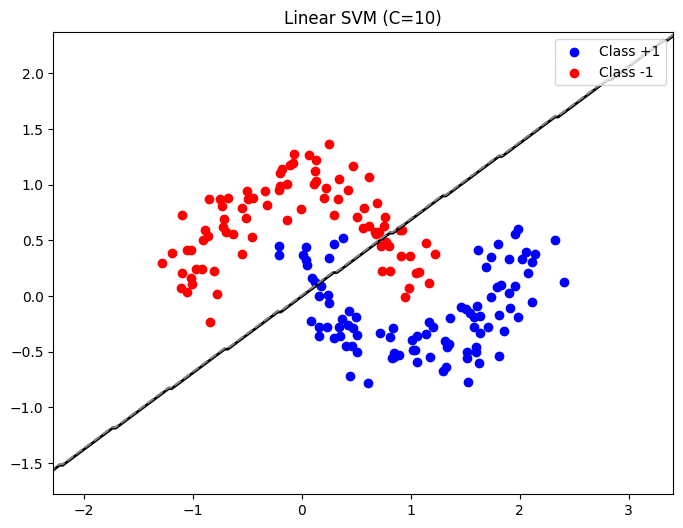


Training RBF Kernel SVM using SMO...
Training done. 179 support vectors found.
RBF C=0.01, sigma=0.1: val_acc=0.50
Training done. 176 support vectors found.
RBF C=0.01, sigma=0.3: val_acc=0.50
Training done. 171 support vectors found.
RBF C=0.01, sigma=1: val_acc=0.50
Training done. 168 support vectors found.
RBF C=0.01, sigma=3: val_acc=0.50
Training done. 178 support vectors found.
RBF C=0.1, sigma=0.1: val_acc=0.52
Training done. 130 support vectors found.
RBF C=0.1, sigma=0.3: val_acc=0.95
Training done. 105 support vectors found.
RBF C=0.1, sigma=1: val_acc=0.80
Training done. 156 support vectors found.
RBF C=0.1, sigma=3: val_acc=0.72
Training done. 135 support vectors found.
RBF C=1, sigma=0.1: val_acc=0.97
Training done. 42 support vectors found.
RBF C=1, sigma=0.3: val_acc=0.97
Training done. 54 support vectors found.
RBF C=1, sigma=1: val_acc=0.88
Training done. 84 support vectors found.
RBF C=1, sigma=3: val_acc=0.78
Training done. 134 support vectors found.
RBF C=10, sigma

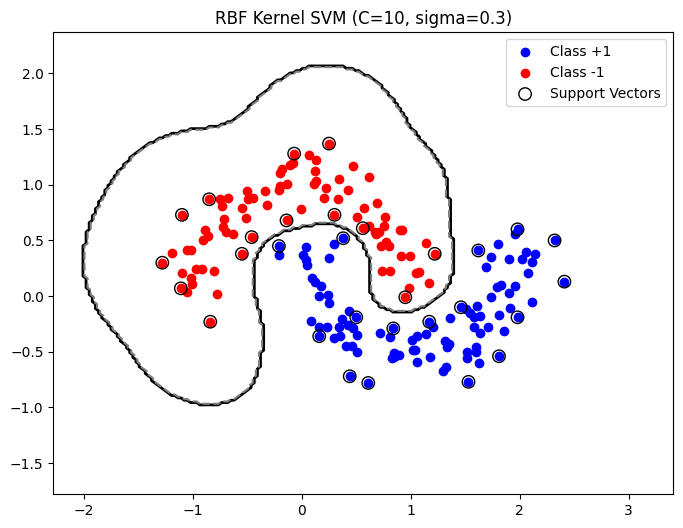


Training Polynomial Kernel SVMs...
Training done. 94 support vectors found.
Poly C=0.01: val_acc=0.78
Training done. 56 support vectors found.
Poly C=0.1: val_acc=0.88
Training done. 30 support vectors found.
Poly C=1: val_acc=0.95
Training done. 17 support vectors found.
Poly C=10: val_acc=0.97
Training done. 12 support vectors found.
Poly C=100: val_acc=0.95
Selected Polynomial SVM (deg=3): C=10, val_acc=0.97, test_acc=0.98

FINAL SUMMARY
Linear SVM: C=10, val_acc=0.97, test_acc=0.98
RBF SVM: C=10, sigma=0.3, val_acc=0.97, test_acc=0.98
Poly SVM (deg=3): C=10, val_acc=0.97, test_acc=0.98


In [109]:
X_train, y_train = load_data(train_file)
X_val, y_val = load_data(val_file)
X_test, y_test = load_data(test_file)
# -------- Linear SVM --------
print("\nTraining Linear SVM using SGD...")
best_val_acc, best_C = 0, None
for C in [0.01, 0.1, 1, 10, 100]:
    model = LinearSVM(c=C, lr=0.001, epochs=500)
    model.fit(X_train, y_train)
    val_acc = np.mean(model.predict(X_val) == y_val)
    print(f"C={C}: val_acc={val_acc:.2f}")
    if val_acc > best_val_acc:
        best_val_acc, best_C, best_model = val_acc, C, model
test_acc = np.mean(best_model.predict(X_test) == y_test)
print(f"Selected Linear SVM: C={best_C}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")
plot_decision_boundary(X_train, y_train, lambda X: best_model.predict(X),
                       f"Linear SVM (C={best_C})", filename="linear_decision_boundary.png")
# -------- Kernel SVM (RBF) --------
print("\nTraining RBF Kernel SVM using SMO...")
best_val_acc, best_params = 0, None
for C in [0.01, 0.1, 1, 10, 100]:
    for sigma in [0.1, 0.3, 1, 3]:
        model = KernelSVM(c=C, kernel='rbf', sigma=sigma)
        model.fit(X_train, y_train)
        val_acc = np.mean(model.predict(X_val) == y_val)
        print(f"RBF C={C}, sigma={sigma}: val_acc={val_acc:.2f}")
        if val_acc > best_val_acc:
            best_val_acc, best_params, best_rbf = val_acc, (C, sigma), model
test_acc = np.mean(best_rbf.predict(X_test) == y_test)
print(f"Selected RBF SVM: C={best_params[0]}, sigma={best_params[1]}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")
plot_decision_boundary(X_train, y_train, lambda X: best_rbf.predict(X),
                       f"RBF Kernel SVM (C={best_params[0]}, sigma={best_params[1]})",
                       support_vectors=X_train[best_rbf.support_indices],
                       filename="rbf_decision_boundary.png")
# -------- Polynomial Kernel --------
print("\nTraining Polynomial Kernel SVMs...")
best_val_acc, best_poly_C = 0, None
for C in [0.01, 0.1, 1, 10, 100]:
    model = KernelSVM(c=C, kernel='poly', degree=3)
    model.fit(X_train, y_train)
    val_acc = np.mean(model.predict(X_val) == y_val)
    print(f"Poly C={C}: val_acc={val_acc:.2f}")
    if val_acc > best_val_acc:
        best_val_acc, best_poly_C, best_poly = val_acc, C, model
test_acc = np.mean(best_poly.predict(X_test) == y_test)
print(f"Selected Polynomial SVM (deg=3): C={best_poly_C}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")
# Final Summary
print("\nFINAL SUMMARY")
print(f"Linear SVM: C={best_C}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")
print(f"RBF SVM: C={best_params[0]}, sigma={best_params[1]}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")
print(f"Poly SVM (deg=3): C={best_poly_C}, val_acc={best_val_acc:.2f}, test_acc={test_acc:.2f}")

# DBSCAN

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
class DBSCAN:
    def __init__(self, eps=3, minPts=2):
        self.eps = eps
        self.minPts = minPts

    def fit(self, X):
        self.X = X
        n = len(X)
        self.visited = np.zeros(n, dtype=bool)
        self.cluster_labels = np.zeros(n, dtype=int)
        self.core_points = []
        self.cluster_id = 0

        self.dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                self.dist_matrix[i, j] = np.linalg.norm(X[i] - X[j])
        self.dist_matrix = np.round(self.dist_matrix, 2)

        self.neighbors = []
        for i in range(n):
            neigh = np.where(self.dist_matrix[i] <= self.eps)[0]
            self.neighbors.append(neigh)
            if len(neigh) >= self.minPts:
                self.core_points.append(i)

        for i in range(n):
            if not self.visited[i] and i in self.core_points:
                self.cluster_id += 1
                self.expand_cluster(i)

    def expand_cluster(self, i):
        queue = [i]
        while queue:
            point = queue.pop(0)
            if not self.visited[point]:
                self.visited[point] = True
                self.cluster_labels[point] = self.cluster_id
                if point in self.core_points:
                    for neigh in self.neighbors[point]:
                        if self.cluster_labels[neigh] == 0:
                            queue.append(neigh)

    def noise_ratio(self):
        noise_count = np.sum(self.cluster_labels == 0)
        return noise_count / len(self.X)

    def print_results(self):
        print("Core points:", ' '.join(str(i+1) for i in self.core_points))
        print("Cluster Assignments:", ' '.join(str(lbl) for lbl in self.cluster_labels))
        print("Noise Ratio =", round(self.noise_ratio(), 2))

    def plot_clusters(self):
        plt.figure(figsize=(6, 5))
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
        for idx, label in enumerate(set(self.cluster_labels)):
            if label == 0:
                pts = self.X[self.cluster_labels == label]
                plt.scatter(pts[:, 0], pts[:, 1], marker='x', color='k', label='Noise')
            else:
                pts = self.X[self.cluster_labels == label]
                plt.scatter(pts[:, 0], pts[:, 1], color=colors[label % len(colors)], label=f'Cluster {label}')
        plt.title(f'DBSCAN Clustering (eps={self.eps}, minPts={self.minPts})')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.show()

    

Core points: 1 2 3 4
Cluster Assignments: 1 1 2 2 0
Noise Ratio = 0.2


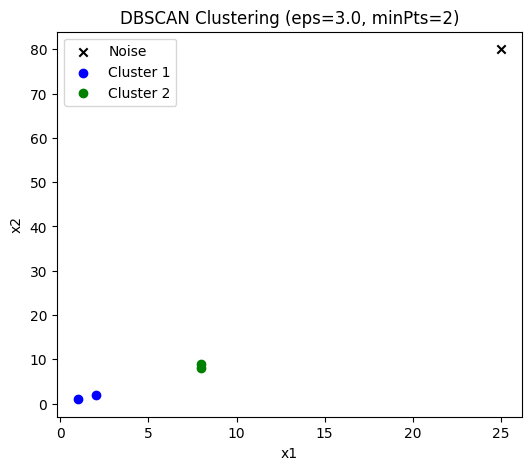

In [118]:
n = int(input("Enter number of points: "))
points = []
for i in range(n):
    x1, x2 = map(float, input(f"Enter coordinates for point {i+1} (x1 x2): ").split())
    points.append([x1, x2])
X = np.array(points)
eps = float(input("Enter epsilon (eps): "))
minPts = int(input("Enter minimum points (minPts): "))
db = DBSCAN(eps=eps, minPts=minPts)
db.fit(X)
db.print_results()
db.plot_clusters()